# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-yQ9Pe1jX-NSI2FqYZn30co&si=ura_7Fm-18S4vxx1 >}}

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import graphviz
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. 데이터준비

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 4. `max_features`

`-` `max_features`에 대한 제한을 주지 않음 $\to$ 항상 같은 결과가 나옴 

In [22]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3 
predictr.fit(X,y)
# step4 -- pass 

DecisionTreeRegressor()

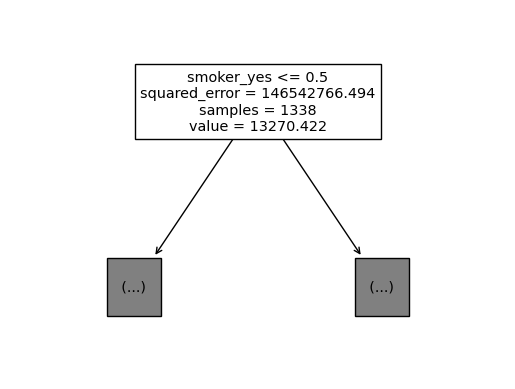

In [23]:
sklearn.tree.plot_tree(predictr,max_depth=0,feature_names=X.columns);

`-` `max_features=4`로 제한 

In [25]:
len(X.columns) 

8

- `max_features=4`로 제한한다는 의미는 8개의 설명변수중에서 4개만 임의로 뽑아서 그중에서 "최적의 변수"와 "최적의 $c$"를 찾겠다는 의미

In [66]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor(max_features=4)
# step3 
predictr.fit(X,y)
# step4 -- pass 

DecisionTreeRegressor(max_features=4)

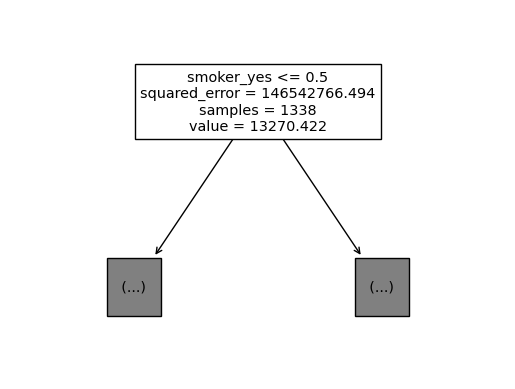

In [68]:
sklearn.tree.plot_tree(predictr,max_depth=0,feature_names=X.columns);

- 절반정도는 smoking 유무가 가장 위에 위치한다. 

# 5. `random_state`

`-` `max_features=4`로 제한 

In [115]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor(max_features=4,random_state=43)
# step3 
predictr.fit(X,y)
# step4 -- pass 

DecisionTreeRegressor(max_features=4, random_state=43)

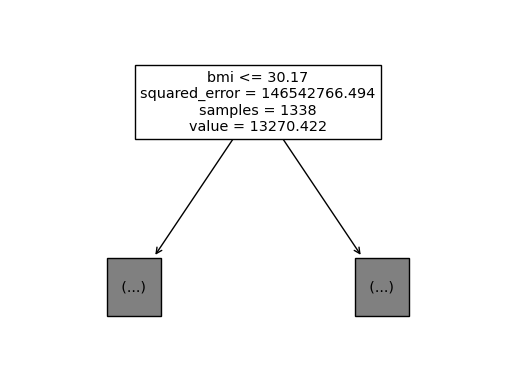

In [116]:
sklearn.tree.plot_tree(predictr,max_depth=0,feature_names=X.columns);